

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 In this project we will investigate which factors are important to predict if a patient will or won't show up for a medical appointment. We will analyze factors such as the enrollment in the scholarship program called "Bolsa Famíla", and some other features like the alcoholism issue, gender and age. In this notebook, every step used to treat and analyze the data will be finely detailed.

We will start by importing the necessary packages to perform the analysis by the following libraries:

* Pandas
* Numpy
* Matplotlib

Questions to be investigated:
* What is the proportion of  medical appointment shows versus no shows?
* What are the most related features to the patient appearence to their medical appointments?
* Which neighborhoods have the highest number of no-shows?
* Is No Show medical aapointments gender oriented?
* Does  "Bolsa Família" scholarship program affect or relevant to predict if a patient won't show up to their medical appointment?


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib 


Here, we are creating NDeprows function to count number of duplicated rows at the data set to make use of it later to avoid repetitive code.

In [140]:
def NDepRows (dataframe):
    
    n = len(dataframe)-len(dataframe.drop_duplicates())
    return n


<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 
 

### General Properties
We will now load the CSV file containing the no-show records and read the first lines to evaluate the data.

In [141]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We have some interesting factors:
* the enrollment in the scholarship program ("Bolsa Família")
* if the patient has diabetes
* if the patient is an alcoholic
* has some form of handcap 
* if a text message was received by the patient containing information about the medical appointment.


Now, We will evaluate the data types of the data set.






In [142]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [143]:
#checking for null values
df.isnull().values.ravel().sum()

0

In [144]:
#number of samples and rows in datasetz
df.shape

(110527, 14)

In [145]:
#number of duplicate rows
NDepRows(df)

0

In [146]:
#features with missing values
df.shape[0] - df.dropna().shape[0]

0

In [147]:
#number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Looks like we have a pretty clean dataset, with 110527 records and 10 columns. The columns which are used to describe if the patient has some medical condition (diabetes, hipertension, alcoholism) are of int types, which can make the operations and graph plots much easier.

In [148]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [149]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



By looking at the mean row we can extract some interesting information:
The average age of the patients is 37. 
Approximately 9% of them are enrolled in the "Bolsa Família" scholarship program. 
* 19% have hipertension. 
* 7% of the patients have diabetes. 
* 3% are alcoholics. 
* 2% have some kind of handcap. 
* 32% of the appointments, a text message was received about the appointment.

### Data Cleaning 
Now, we will perform some cleaning on this dataset.\

First, we will correct columns names and convert letters that are upper case into lower case.

In [150]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [151]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [152]:
df.rename(columns={'hipertension':'hypertension'}, inplace=True)

In [153]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [154]:
# drop the following columns from  dataframe, since they're not relevant to analysis
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)

In [155]:
df.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

We also need to perform some cleaning on the 'age' column, since some negative values were found.

In [156]:
# search for negative values for the 'age' column
df.query("age < 0")

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [157]:
# drop the line containing the negative age value
df.drop(df.index[99832], inplace=True)

Now, we will change the values of 'no_show' to 1's and 0's to be more logical to our analysis.

In [158]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [159]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the proportion of appointment shows versus no shows?)


20.193438647919944


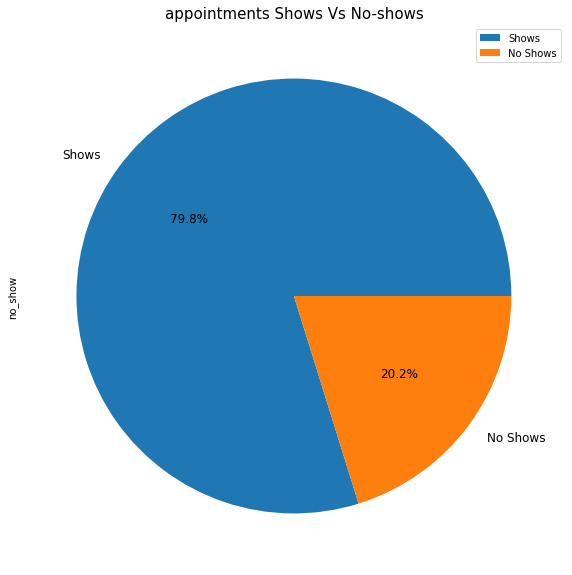

In [160]:
show= df['no_show'].value_counts()
labels = ['Shows','No Shows']
print(show[1] / show.sum() * 100)
chart = show.plot.pie(figsize=(10,10), labels=labels, autopct='%1.1f%%', fontsize = 12);
chart.set_title("appointments Shows Vs No-shows", fontsize = 15);
plt.legend();

### pie chart to visualize who showed up and who didn't.

### Research Question 2  (what are the most related features to the patient appearence to their appointments?)

In [161]:
# dataframe containing appointments of the patients who didn't showed up.
noshow_df = df.query('no_show == 1')

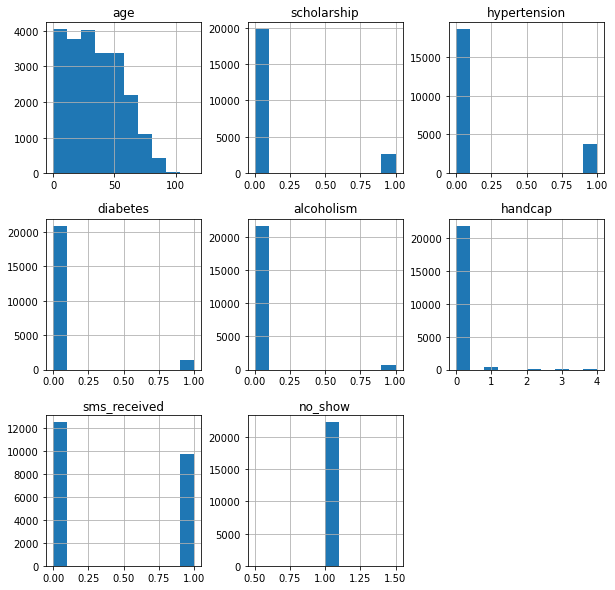

In [162]:
# generate a histogram from each column of dataframe.
noshow_df.hist(figsize=(10,10));


we can see some interesting facts
* From the age histogram, the values are more skewed to the right, which shows that younger patients are more likely to skip their appointments.
* The patients that suffer from hypertension skipped appointments more than any other patients with health conditions. 
* a large number of patients that received the SMS message also skipped their appointments. 

In [163]:
# number of male and female patients that didn't showed up
noshow_df.gender.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

In [164]:
#total number of patients who didn't show up are 22319
noshow_df.shape

(22319, 10)

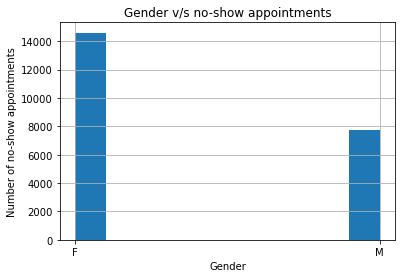

In [165]:
noshow_df.gender.hist();
# plotting the x label
plt.xlabel('Gender');
# plotting the y label
plt.ylabel('Number of no-show appointments');
# plotting the title of our histogram
plt.title('Gender v/s no-show appointments');

Apparently, more women didn't showed up to their appointments.\
So, let's create two more dataframes that contain male and female patients that didn't show up and take look of the histograms for each gender.

In [166]:
#new dataframe with only female patients
fnoshow_df = noshow_df.query('gender == "F"')
#new dataframe with only male patients
mnoshow_df = noshow_df.query('gender == "M"')

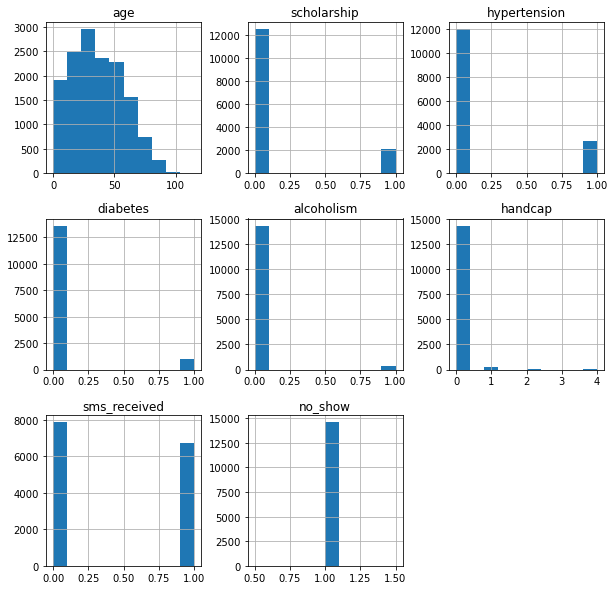

In [167]:
# generate a histogram, male patients
fnoshow_df.hist(figsize=(10, 10));

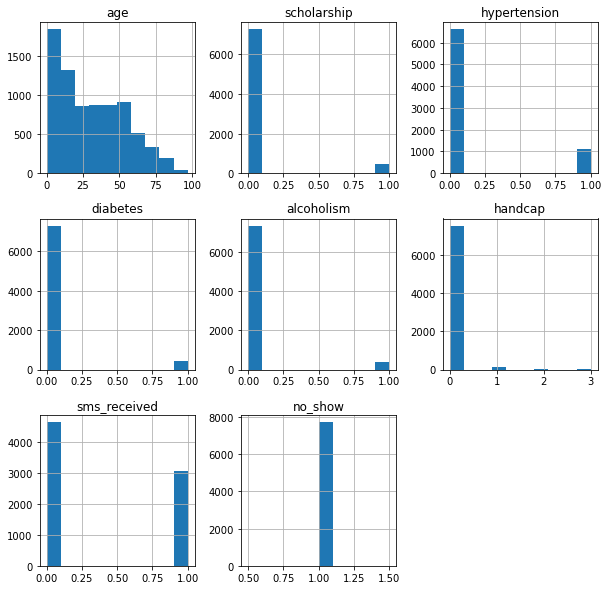

In [168]:
# generate a histogram, female patients
mnoshow_df.hist(figsize=(10, 10));

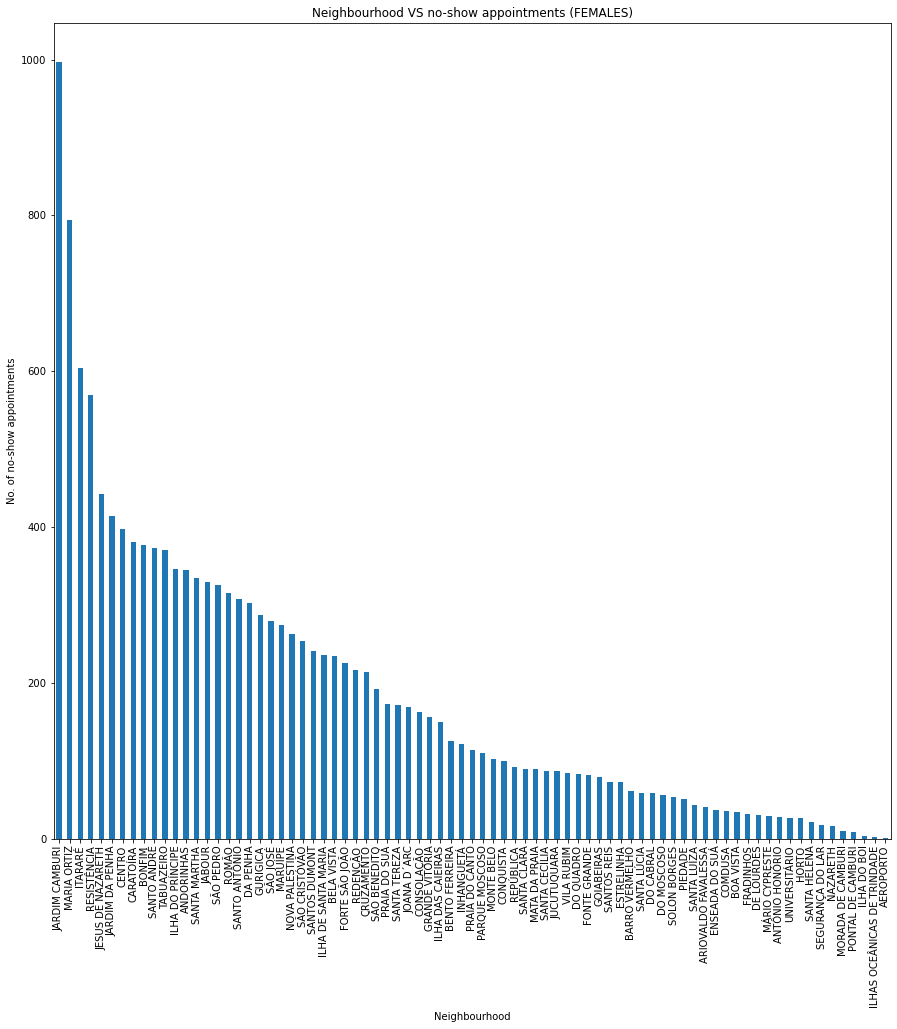

In [169]:
# plot a bar chart with the neighbourhoods where
# female patients didn't showed up for their appointments
fnoshow_df['neighbourhood'].value_counts().plot(kind='bar', figsize=(15, 15));
# plot x label
plt.xlabel('Neighbourhood');
# plot y label
plt.ylabel('No. of no-show appointments');
# plot title
plt.title('Neighbourhood VS no-show appointments (FEMALES)');

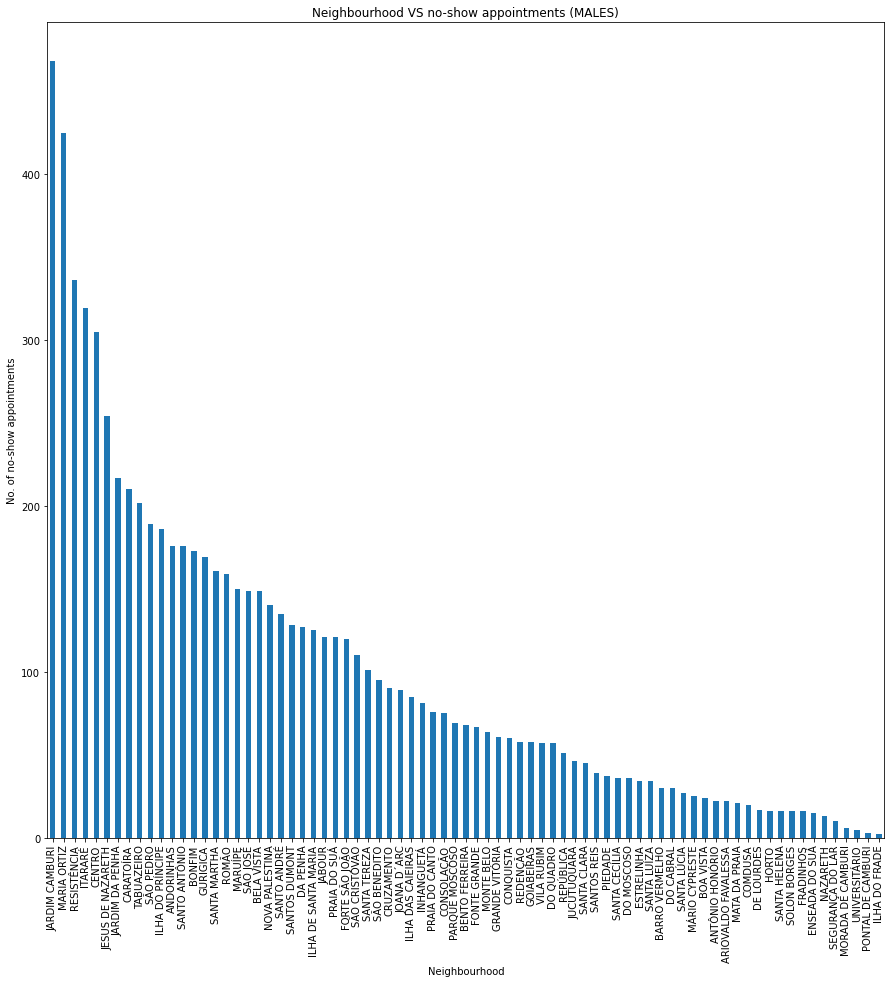

In [170]:
# plotting a bar chart with the neighbourhoods
# where male patients didn't showed up for their appointments.
mnoshow_df['neighbourhood'].value_counts().plot(kind='bar', figsize=(15, 15));
# plot x label
plt.xlabel('Neighbourhood');
# plot y label
plt.ylabel('No. of no-show appointments');
# plot title
plt.title('Neighbourhood VS no-show appointments (MALES)');

As I see it, For both bar charts above, we can see that the "Jardim Camburi" and the "Maria Ortiz" neighbourhoods had more no-show records than any other.


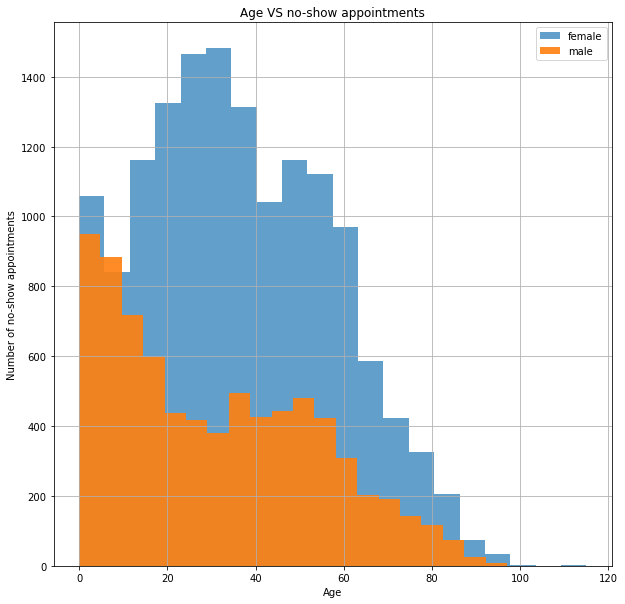

In [171]:
# plot histogram for female patients
fnoshow_df.age.hist(figsize=(10,10), alpha=0.7, bins=20, label='female')
# plot histogram for male patients
mnoshow_df.age.hist(figsize=(10,10), alpha=0.9, bins=20, label='male')

# plot x label
plt.xlabel('Age');
# plot y label
plt.ylabel('Number of no-show appointments');
# plot title
plt.title('Age VS no-show appointments');
# plot legend
plt.legend();

So, by looking at both histograms of age we can see that:

* Most of the female patients that didn't showed up their appointments are around 20-40 years old
* Most of the male patients that didn't showed up their appointments are around 0-20 years old

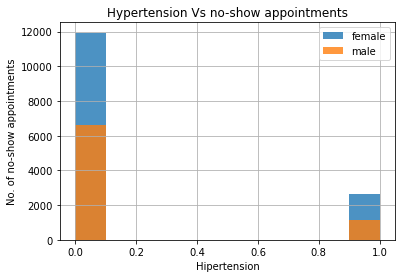

In [172]:
# plot the hipertension histogram for female patients
fnoshow_df.hypertension.hist(alpha=0.8, label='female')
# plot the hipertension histogram for male patients
mnoshow_df.hypertension.hist(alpha=0.8, label='male')
# plot x label
plt.xlabel('Hipertension');
# plot y label
plt.ylabel('No. of no-show appointments');
# plot title
plt.title('Hypertension Vs no-show appointments');
# plot legend
plt.legend();

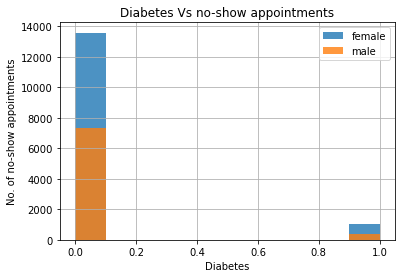

In [173]:
# plot the diabetes histogram for male patients
fnoshow_df.diabetes.hist(alpha=0.8, label='female')
# plot the diabetes histogram for male patients
mnoshow_df.diabetes.hist(alpha=0.8, label='male')
# plot x label
plt.xlabel('Diabetes');
# plot y label
plt.ylabel('No. of no-show appointments');
# plot title
plt.title('Diabetes Vs no-show appointments');
# plot legend
plt.legend();

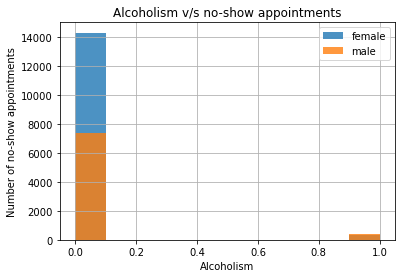

In [174]:
# plot the alcoholism histogram for female patients
fnoshow_df.alcoholism.hist(alpha=0.8, label='female')
# plot the alcoholism histogram for male patients
mnoshow_df.alcoholism.hist(alpha=0.8, label='male')
# plot x label
plt.xlabel('Alcoholism');
# plot y label
plt.ylabel('Number of no-show appointments');
# plot title
plt.title('Alcoholism v/s no-show appointments');
# plot legend
plt.legend();

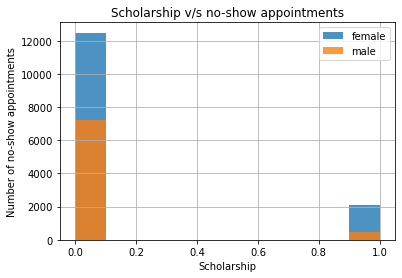

In [175]:
# plot the scholarship histogram for female patients
fnoshow_df.scholarship.hist(alpha=0.8, label='female')
# plot the scholarship histogram for male patients
mnoshow_df.scholarship.hist(alpha=0.8, label='male')
# plot x label
plt.xlabel('Scholarship');
# plot y label
plt.ylabel('Number of no-show appointments');
# plot title
plt.title('Scholarship v/s no-show appointments');
# plot legend
plt.legend();

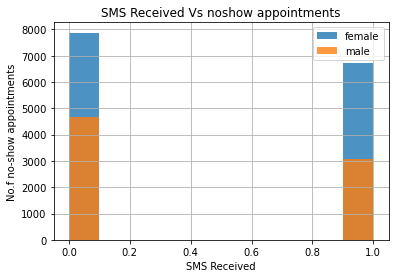

In [176]:
# plot the sms_received histogram for female patients
fnoshow_df.sms_received.hist(alpha=0.8, label='female')
# plot the sms_received histogram for male patients
mnoshow_df.sms_received.hist(alpha=0.8,label='male')
# plot x label
plt.xlabel('SMS Received');
# plot y label
plt.ylabel('No.f no-show appointments');
# plot title
plt.title('SMS Received Vs noshow appointments');
# plot legend
plt.legend();

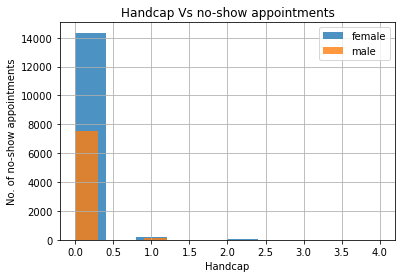

In [177]:
# plot the handcap histogram for female patients
fnoshow_df.handcap.hist(alpha=0.8, label='female')
# plot the handcap histogram for male patients
mnoshow_df.handcap.hist(alpha=0.8, label='male')
# plot x label
plt.xlabel('Handcap');
# plot y label
plt.ylabel('No. of no-show appointments');
# plot title
plt.title('Handcap Vs no-show appointments');
# plot legend
plt.legend();

Next, we will analyze all of the health conditions Vs age of the patients.

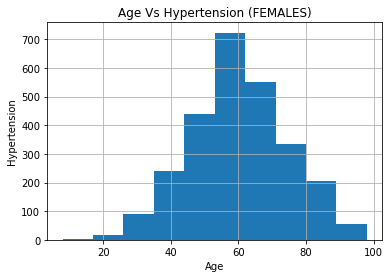

In [178]:
#histogram only with female patients that have hypertension
fnoshow_df.query('hypertension == 1').age.hist()
# plot title
plt.title("Age Vs Hypertension (FEMALES)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Hypertension");

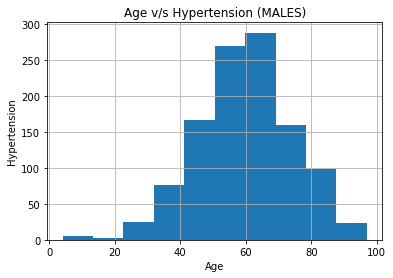

In [179]:
# histogram only with male patients that have hipertension
mnoshow_df.query('hypertension == 1').age.hist()
# plot title
plt.title("Age v/s Hypertension (MALES)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Hypertension");

We can see - in both cases - that patients with hypertension and around 40-80 years old are more likely to miss their medical appointments.

Next, we will look at the diabetes condition.

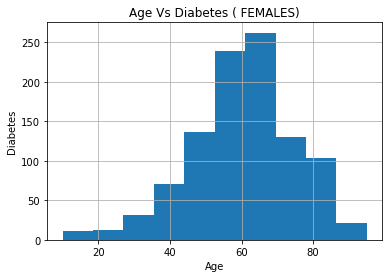

In [180]:
# histogram only with female patients that have diabetes
fnoshow_df.query('diabetes == 1').age.hist()
# plot title
plt.title("Age Vs Diabetes ( FEMALES)");
# plot  x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Diabetes");

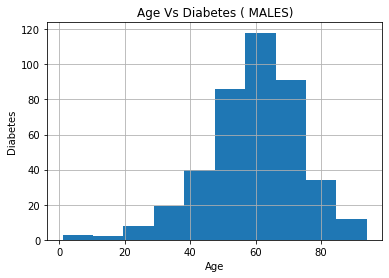

In [181]:
#histogram only with male patients that have diabetes
mnoshow_df.query('diabetes == 1').age.hist()
# plot title
plt.title("Age Vs Diabetes ( MALES)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Diabetes");

We can see in both cases that:
* male patients around 60 years old are more likely to miss their medical appointments.
* female patients around 55-65 years old are more likely to skip their appointments.


Next, we will look at the alcoholism condition. 

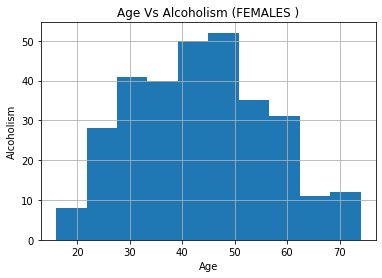

In [182]:
# histogram only with female patients that are alcoholics
fnoshow_df.query('alcoholism == 1').age.hist()
# plot title
plt.title("Age Vs Alcoholism (FEMALES )");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Alcoholism");

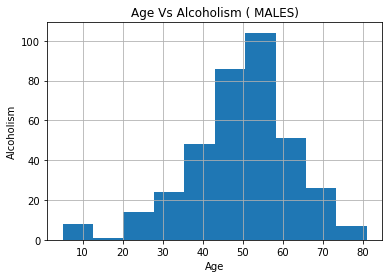

In [183]:
# histogram only with male patients that are alcoholics
mnoshow_df.query('alcoholism == 1').age.hist()
# plot title
plt.title("Age Vs Alcoholism ( MALES)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Alcoholism");

We can see that:
* male patients around 40-60 years old are more likely to miss their medical appointments.
* female patients around 40 years old are more likely to skip their appointments.


Next, we will look at the patients who are enrolled in the "Bolsa Família" scholarship program

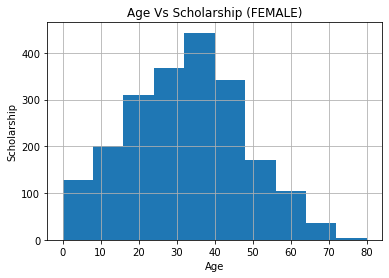

In [184]:
#histogram only with female patients that are enrolled on the Bolsa Família scholarship
fnoshow_df.query('scholarship == 1').age.hist()
# plot title
plt.title("Age Vs Scholarship (FEMALE)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Scholarship");

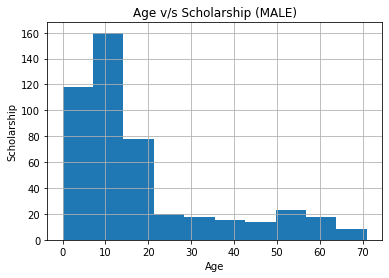

In [185]:
# histogram only with male patients that are enrolled on the Bolsa Família scholarship
mnoshow_df.query('scholarship == 1').age.hist()
# plot title
plt.title("Age v/s Scholarship (MALE)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Scholarship");

We can see that:
* male patients around 0-20 years old are more likely to miss their medical appointments.
* female patients around 30-40 years old are more likely to skip their appointments.

Next, we'll look at patients who have some sort of handcap.

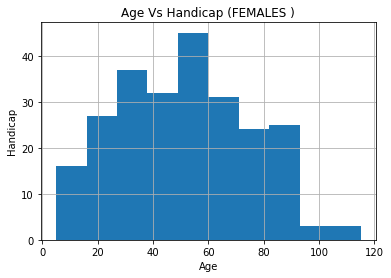

In [186]:
#histogram only with female patients that have some sort of handcap
fnoshow_df.query('handcap > 0').age.hist()
# plot title
plt.title("Age Vs Handicap (FEMALES )");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Handicap");


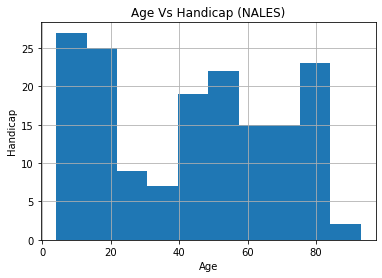

In [187]:
#histogram only with male patients that have some sort of handcap
mnoshow_df.query('handcap > 0').age.hist()
# plot title
plt.title("Age Vs Handicap (NALES)");
# plot x label
plt.xlabel("Age");
# plot y label
plt.ylabel("Handicap");

By looking at the graph we notice that few patients who have some sort of handicap didn't showed up for their appointments, which makes this variable irrelevant.

<a id='conclusions'></a>
## Conclusions
* Sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come.
* Women are more likely to miss their medical appointments.
* The 'Jardim Camburi' and 'Maria Ortiz' neighbourhoods registered a large number of patients who missed their appointments.
* Male patients around 0-20 years old and women around 20-40 years old are more likely to miss their medical appointments.
* Female patients who are enrolled on the 'Bolsa Família' scholarship program are more likely to miss their medical appointments.



## Limitations
* Missing features that could be useful and impacts showing to the appointment such as if the patient is employeed or not 
* The education level of each patient could be an interesting variable to look at.
* The number of neighbourhoods (approximately 60) is too limited, which isn't a representative sample of the Brazilian population.
* Additional details could be given such as the transport to the clinic for example.